In [1]:
%load_ext autoreload
%autoreload

import sys

sys.path.append("../../../GaussNeuro")
import gaussneuro as lib

sys.path.append("../fit/")
import th1

import equinox as eqx
import jax
import jax.numpy as jnp
import jax.random as jr
import numpy as np


import analyze_th1

/var/home/dl543/Documents/Learning/nonparametric-modulated-renewal/scripts/analysis/../../../GaussNeuro/gaussneuro/likelihoods/renewal.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
jax.config.update('jax_platform_name', 'cpu')
#jax.config.update("jax_enable_x64", True)

In [3]:
### names ###
reg_config_names = [
    #'Mouse28_140313_wakeISI5sel0.0to0.5_PP-log__factorized_gp-8-1000_X[hd]_Z[]', 
    #'Mouse28_140313_wakeISI5sel0.0to0.5_PP-log_rcb-8-3.-1.-1.-self-H500_factorized_gp-8-1000_X[hd]_Z[]', 
    'Mouse28_140313_wakeISI5sel0.0to0.5_gamma-log__rate_renewal_gp-8-1000_X[hd]_Z[]', 
    'Mouse28_140313_wakeISI5sel0.0to0.5_lognorm-log__rate_renewal_gp-8-1000_X[hd]_Z[]', 
    'Mouse28_140313_wakeISI5sel0.0to0.5_invgauss-log__rate_renewal_gp-8-1000_X[hd]_Z[]', 
    'Mouse28_140313_wakeISI5sel0.0to0.5_isi4__nonparam_pp_gp-32-matern32-1000-12._X[hd]_Z[]', 
]

tuning_model_name = (
    "th1_U-el-3_svgp-64_X[hd-omega-speed-x-y-time]_Z[]_40K11_0d0_10f-1"
)


data_path = '../../data/th1/'
checkpoint_dir = '../checkpoint/'


seed = 123
rng = np.random.default_rng(seed)
prng_state = jr.PRNGKey(seed)
batch_size = 10000

In [4]:
### load dataset ###
session_name = 'Mouse28_140313_wake'
max_ISI_order = 4

select_fracs = [0.0, 0.5]
dataset_dict = th1.spikes_dataset(session_name, data_path, max_ISI_order, select_fracs)

test_select_fracs = [
    [0.5, 0.6], 
    [0.6, 0.7], 
    [0.7, 0.8], 
    [0.8, 0.9], 
    [0.9, 1.0], 
]
test_dataset_dicts = [
    th1.spikes_dataset(session_name, data_path, max_ISI_order, tf) for tf in test_select_fracs
]

In [6]:
regression_dict = analyze_th1.regression(
    checkpoint_dir, reg_config_names, dataset_dict, test_dataset_dicts, rng, prng_state, batch_size
)

Analyzing regression for Mouse28_140313_wakeISI5sel0.0to0.5_gamma-log__rate_renewal_gp-8-1000_X[hd]_Z[]...
Analyzing regression for Mouse28_140313_wakeISI5sel0.0to0.5_lognorm-log__rate_renewal_gp-8-1000_X[hd]_Z[]...
Analyzing regression for Mouse28_140313_wakeISI5sel0.0to0.5_invgauss-log__rate_renewal_gp-8-1000_X[hd]_Z[]...
Analyzing regression for Mouse28_140313_wakeISI5sel0.0to0.5_isi4__nonparam_pp_gp-32-matern32-1000-12._X[hd]_Z[]...


NameError: name 'ISI_orders' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(['../plots/paper.mplstyle'])

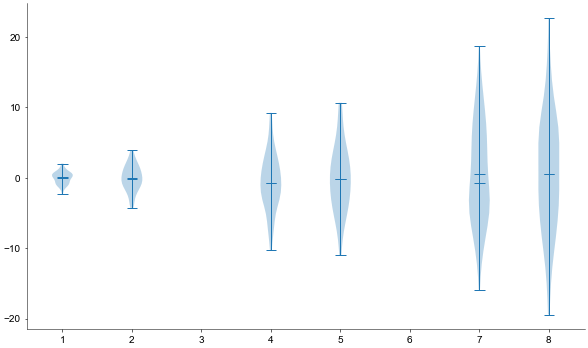

In [3]:
# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

axs.violinplot(
    data, pos, points=20, widths=0.3,
    showmeans=True, showextrema=True, showmedians=True, 
    bw_method='silverman', 
)


plt.show()

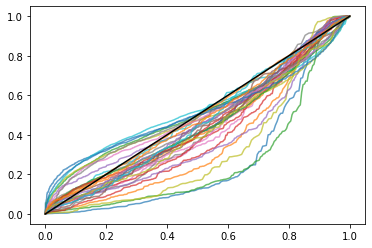

73037.87 64335.367


In [16]:
for n in range(len(sort_cdfs)):
    if sort_cdfs[n] is not None:
        plt.plot(np.linspace(0., 1., len(sort_cdfs[n])), sort_cdfs[n], alpha=0.7)
plt.plot(np.linspace(0., 1., 100), np.linspace(0., 1., 100), c='k')
plt.show()

print(train_ell, test_lpd)

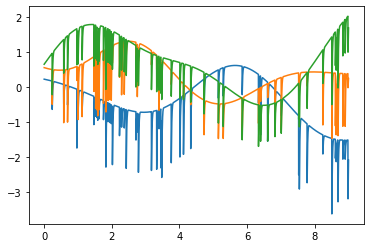

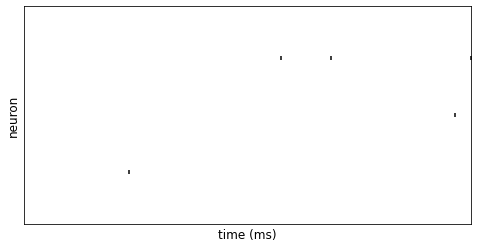

In [30]:
tr = 0

plt.plot(timestamps, log_rho_ts[tr, :, :].T)
plt.show()


fig, ax = plt.subplots(figsize=(8,4))
fig.set_facecolor('white')

lib.utils.plots.raster_plot((fig, ax), y_samples[tr, :, :], ts, dt*1000, neurons, markersize=10)
lib.utils.plots.decorate_ax(ax, xlabel='time (ms)', ylabel='neuron')

plt.show()

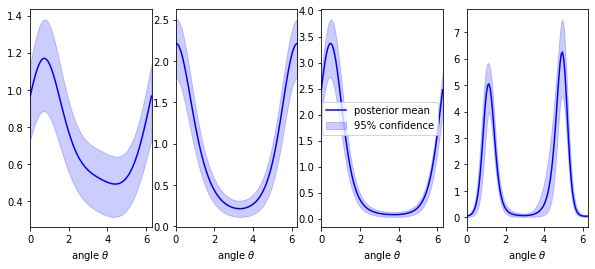

In [18]:
tr = list(range(num_samps))
plot_neurons = 4

fig, axes = plt.subplots(1, plot_neurons, figsize=(10, 4))

for f_dim in range(plot_neurons):
    ax = axes[f_dim]

    line, = ax.plot(x_eval_tun[0, 0, :, 0], post_quantiles[1][f_dim, :], 'b', label='posterior mean')
    ax.fill_between(x_eval_tun[0, 0, :, 0], post_quantiles[0][f_dim, :], post_quantiles[2][f_dim, :], 
                    color=line.get_color(), alpha=0.2, label='95% confidence')
    ax.set_xlim([x_eval_tun[0, 0, 0, 0], x_eval_tun[0, 0, -1, 0]])
    ax.set_xlabel(r'angle $\theta$')
    #ax.set_ylabel(r'$L = {}$'.format(Ls[s]))

    if f_dim == 2:
        ax.legend()
        
    #line, = ax.plot(covariates, rate[f_dim, :])
        

plt.show()

<a id='svgp'></a>
## SVGP

### 2D

In [2]:
x_dims = 2
f_dims = 3

jitter = 1e-12

n_samp = 10

prng_state = jax.random.PRNGKey(123)

In [53]:
var_t = 1.0*np.ones((f_dims))  # GP variance
len_t = 0.3*np.ones((f_dims, 1))  # GP lengthscale
kernt = lib.GP.kernels.Matern52(f_dims, variance=var_t, lengthscale=len_t)

len_fx = 1.0*np.ones((f_dims, x_dims-1))  # GP lengthscale
var_f = 1.*np.ones(f_dims)  # observation noise
kernx = lib.GP.kernels.SquaredExponential(f_dims, variance=var_f, lengthscale=len_fx)

kern = lib.GP.kernels.Product([kernt, kernx], [[0], list(range(1, x_dims))])


### inducing points ###
prng_state, prng_key = jr.split(prng_state)

num_induc = 20
induc_locs = jnp.concatenate(
    [
        jr.uniform(prng_state, shape=(f_dims, num_induc, 1)), 
        jr.normal(prng_key, shape=(f_dims, num_induc, x_dims - 1)), 
    ], axis=-1
)

prng_state, _ = jr.split(prng_state)


mode = 'qSVGP'
if mode == 'qSVGP':
    u_mu = 0. + 1.*jax.random.normal(prng_state, shape=(f_dims, num_induc, 1))
    u_Lcov = 0.1*jnp.eye(num_induc)[None, ...].repeat(f_dims, axis=0)
    
    svgp = lib.GP.sparse.qSVGP(kern, induc_locs, u_mu, u_Lcov, RFF_num_feats=100)
    
    Kzz = svgp.kernel.K(svgp.induc_locs, None, False)
    lambda_1, chol_Lambda_2 = lib.GP.sparse.t_from_q_svgp_moments(Kzz, u_mu, u_Lcov)
    
elif mode == 'tSVGP':
    lambda_1 = 1. + 0.*jax.random.normal(prng_state, shape=(f_dims, num_induc, 1))
    chol_Lambda_2 = 100.*jnp.eye(num_induc)[None, ...].repeat(f_dims, axis=0)
    
    svgp = lib.GP.sparse.tSVGP(kern, induc_locs, lambda_1, chol_Lambda_2, RFF_num_feats=100)
    
    Kzz = svgp.kernel.K(svgp.induc_locs, None, False)
    u_mu, u_Lcov = lib.GP.sparse.t_to_q_svgp_moments(Kzz, lambda_1, chol_Lambda_2, jitter)

In [54]:
prng_state, _ = jr.split(prng_state)

xx = np.meshgrid(*[np.linspace(-3, 3, 30) for _ in range(x_dims)])
xx = jnp.stack(xx, axis=-1)

or_shape = xx.shape[:-1]
xx = xx.reshape(1, 1, -1, x_dims)  # (samp, out_dims, evals, x_dim)
xx_samp = xx.repeat(n_samp, axis=0)

pf_x = svgp.sample_prior(prng_state, xx_samp, jitter)  # (samp, f_dim, evals)
pf_x = pf_x.reshape(n_samp, f_dims, *or_shape)

qf_x, KL = svgp.sample_posterior(prng_state, xx_samp, jitter, compute_KL=True)  # (samp, f_dim, evals)
qf_x = qf_x.reshape(n_samp, f_dims, *or_shape)

qf_m, qf_c, _, _ = svgp.evaluate_posterior(
    xx, mean_only=False, diag_cov=True, compute_KL=False, compute_aux=False, jitter=0.)

qf_m = qf_m.reshape(f_dims, *or_shape)
qf_c = qf_c.reshape(f_dims, *or_shape)

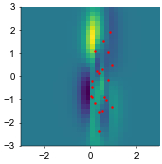

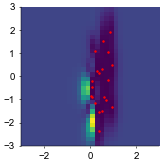

In [55]:
trs = [2, 3]
n = 0

plt.imshow(qf_m[n, ...], extent=[-3, 3, -3, 3], origin='lower', cmap='viridis')
plt.scatter(induc_locs[n, :, 0], induc_locs[n, :, 1], marker='.', color='r')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

plt.imshow(qf_c[n, ...], extent=[-3, 3, -3, 3], origin='lower', cmap='viridis')
plt.scatter(induc_locs[n, :, 0], induc_locs[n, :, 1], marker='.', color='r')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()